In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)


In [2]:
(x_img_train,y_label_train),\
(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
print('train:',len(x_img_train))
print('test:',len(x_img_test))

train: 50000
test: 10000


In [4]:
x_img_train.shape

(50000, 32, 32, 3)

In [5]:
x_img_test[0]

array([[[158, 112,  49],
        [159, 111,  47],
        [165, 116,  51],
        ...,
        [137,  95,  36],
        [126,  91,  36],
        [116,  85,  33]],

       [[152, 112,  51],
        [151, 110,  40],
        [159, 114,  45],
        ...,
        [136,  95,  31],
        [125,  91,  32],
        [119,  88,  34]],

       [[151, 110,  47],
        [151, 109,  33],
        [158, 111,  36],
        ...,
        [139,  98,  34],
        [130,  95,  34],
        [120,  89,  33]],

       ...,

       [[ 68, 124, 177],
        [ 42, 100, 148],
        [ 31,  88, 137],
        ...,
        [ 38,  97, 146],
        [ 13,  64, 108],
        [ 40,  85, 127]],

       [[ 61, 116, 168],
        [ 49, 102, 148],
        [ 35,  85, 132],
        ...,
        [ 26,  82, 130],
        [ 29,  82, 126],
        [ 20,  64, 107]],

       [[ 54, 107, 160],
        [ 56, 105, 149],
        [ 45,  89, 132],
        ...,
        [ 24,  77, 124],
        [ 34,  84, 129],
        [ 21,  67, 110]]

In [6]:
y_label_train.shape

(50000, 1)

In [7]:
label_dict = \
{0: "airplane", 1: "automobile", 2: "bird", 3: "cat", 4: "deer", 5: "dog", 6: "frog", 7: "horse", 8: "ship", 9: "truck"}

In [8]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num>25: num=25
    for i in range(0,num):
        ax=plt.subplot(5,5,1+i)
        ax.imshow(images[idx],cmap='binary')
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

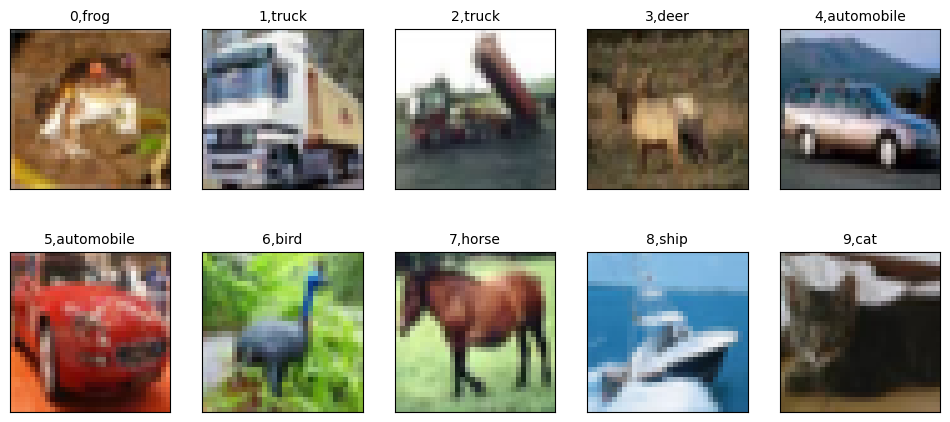

In [9]:
plot_images_labels_prediction(x_img_train, y_label_train, [], 0)

In [10]:
x_img_train[0][0][0]

array([59, 62, 63], dtype=uint8)

In [11]:
x_img_train_normalize = x_img_train.astype('float32') /255.0
x_img_test_normalize = x_img_test.astype('float32') /255.0

In [12]:
x_img_train_normalize[0][0][0]

array([0.23137255, 0.24313726, 0.24705882], dtype=float32)

In [13]:
y_label_train.shape

(50000, 1)

In [14]:
y_label_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [15]:
from tensorflow.python.keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [16]:
y_label_train_OneHot.shape

(50000, 10)

In [17]:
y_label_train_OneHot[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [18]:
print("train data:", "images:", x_img_train.shape, "labels:", y_label_train.shape)
print("test data:", "images:", x_img_test.shape, "labels:", y_label_test.shape)

train data: images: (50000, 32, 32, 3) labels: (50000, 1)
test data: images: (10000, 32, 32, 3) labels: (10000, 1)


In [19]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D, ZeroPadding2D

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,32,3),activation='relu',padding='same'))

C:\Users\user\Aianaa\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [22]:
model.add(Dropout(rate=0.25))

In [23]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [24]:
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(32,32,3),activation='relu',padding='same'))

In [25]:
model.add(Dropout(rate=0.25))

In [26]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [27]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [28]:
model.add(Dense(1024,activation='relu'))
model.add(Dropout(rate=0.25))

In [29]:
model.add(Dense(10,activation='softmax'))

In [30]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     4,195,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,224,970 (16.12 MB)

 Trainable params: 4,224,970 (16.12 MB)

 Non-trainable params: 0 (0.00 B)

None


In [31]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [32]:
train_history=model.fit(x_img_train_normalize,y_label_train_OneHot,validation_split=0.2,epochs=15,batch_size=128,verbose=1)

Epoch 1/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 95ms/step - accuracy: 0.3384 - loss: 1.8297 - val_accuracy: 0.5555 - val_loss: 1.3434
Epoch 2/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 92ms/step - accuracy: 0.5687 - loss: 1.2129 - val_accuracy: 0.6140 - val_loss: 1.1567
Epoch 3/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 91ms/step - accuracy: 0.6300 - loss: 1.0486 - val_accuracy: 0.6567 - val_loss: 1.0928
Epoch 4/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 90ms/step - accuracy: 0.6663 - loss: 0.9407 - val_accuracy: 0.6677 - val_loss: 1.0240
Epoch 5/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 93ms/step - accuracy: 0.7004 - loss: 0.8605 - val_accuracy: 0.6881 - val_loss: 0.9820
Epoch 6/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 93ms/step - accuracy: 0.7327 - loss: 0.7654 - val_accuracy: 0.7114 - val_loss: 0.8807
Epoch 7/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 92ms/step - accuracy: 0.7558 - loss: 0.6990 - val_accuracy: 0.7138 - val_loss: 0.8889
Epoch 8/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 93ms/step - accuracy: 0.7833 - loss: 0.6165 - 

In [33]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

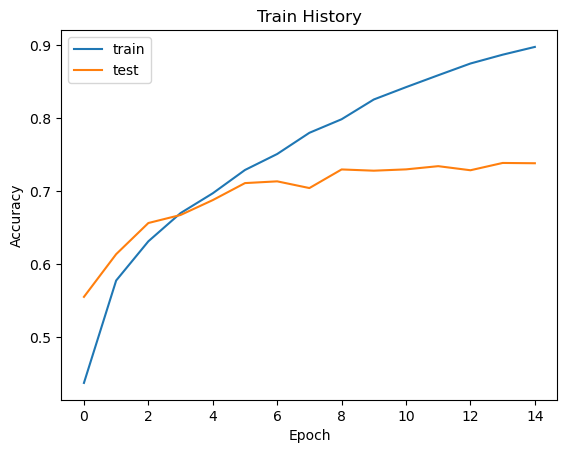

In [34]:
show_train_history('accuracy', 'val_accuracy')

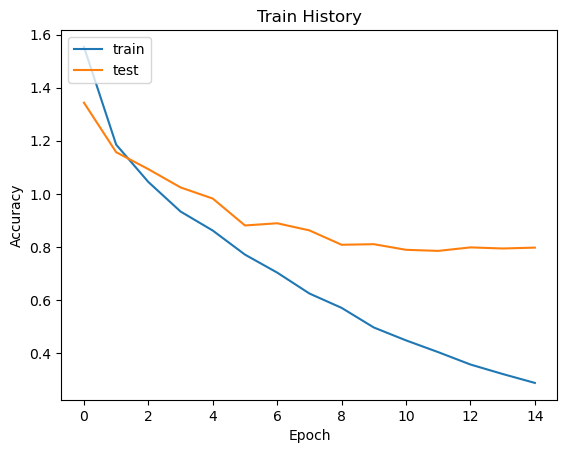

In [35]:
show_train_history('loss', 'val_loss')

In [36]:
scores = model.evaluate(x_img_test_normalize,y_label_test_OneHot, verbose=0)
scores[1]

0.7301999926567078

In [37]:
prediction=model.predict(x_img_test_normalize) 
prediction=np.argmax(prediction,axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [38]:
prediction[:10]

array([3, 8, 0, 0, 6, 6, 1, 2, 3, 1], dtype=int64)

In [39]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num>25: num=25
    for i in range(0,num):
        ax=plt.subplot(5,5,1+i)
        ax.imshow(images[idx],cmap='binary')
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

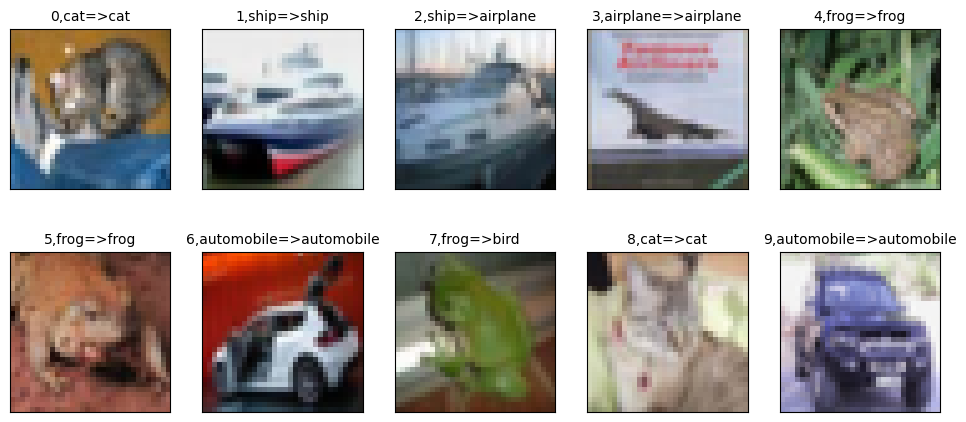

In [40]:
plot_images_labels_prediction(x_img_test_normalize,y_label_test,prediction,0,10)

In [41]:
Predicted_Probability=model.predict(x_img_test_normalize)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [42]:
%matplotlib inline

In [43]:
def show_Predicted_Probability(y,prediction, x_img,Predicted_Probability,i):
    print('label:',label_dict[y[i][0]], 'predict:',label_dict[prediction[i]])
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(x_img_test[i],(32,32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+'Probability:%1.9f'%(Predicted_Probability[i][j]))

label: cat predict: cat


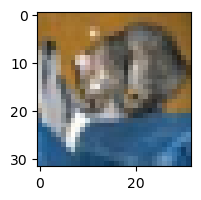

airplaneProbability:0.004940453
automobileProbability:0.005900972
birdProbability:0.037376128
catProbability:0.521208584
deerProbability:0.018116286
dogProbability:0.329268515
frogProbability:0.025671635
horseProbability:0.018818872
shipProbability:0.030909467
truckProbability:0.007789060


In [44]:
show_Predicted_Probability(y_label_test,prediction, x_img_test,Predicted_Probability,0)

label: airplane predict: airplane


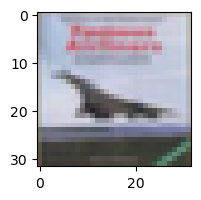

airplaneProbability:0.800570548
automobileProbability:0.065717503
birdProbability:0.012907227
catProbability:0.001944956
deerProbability:0.004733323
dogProbability:0.000005619
frogProbability:0.000568487
horseProbability:0.000171139
shipProbability:0.102548689
truckProbability:0.010832497


In [45]:
show_Predicted_Probability(y_label_test,prediction, x_img_test,Predicted_Probability,3)

In [46]:
prediction.shape

(10000,)

In [47]:
y_label_test.shape

(10000, 1)

In [48]:
y_label_test.reshape(-1)

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [49]:
import pandas as pd
print(label_dict)
pd.crosstab(y_label_test.reshape(-1),prediction,rownames=['label'],colnames=['predict'])

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,808,9,38,12,13,3,15,11,63,28
1,22,856,3,10,3,3,5,5,26,67
2,68,6,631,53,93,40,54,33,14,8
3,30,11,63,508,92,161,72,34,15,14
4,22,2,69,42,721,28,46,59,10,1
5,20,3,66,162,77,570,37,52,9,4
6,4,8,52,43,44,15,820,6,7,1
7,25,4,40,38,60,47,9,761,3,13
8,53,36,17,11,5,8,4,2,847,17


In [50]:
from keras.layers import BatchNormalization

model = Sequential()

# 第一個卷積層
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())  # 添加批次標準化層
# 第二個卷積層
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())  # 添加批次標準化層
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# 第三個卷積層
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())  # 添加批次標準化層
# 第四個卷積層
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())  # 添加批次標準化層
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# 全連接層
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())  # 添加批次標準化層
model.add(Dropout(rate=0.5))
model.add(Dense(10, activation='softmax'))


C:\Users\user\Aianaa\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [51]:
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)


In [52]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [53]:
train_history = model.fit(
    x_img_train_normalize,
    y_label_train_OneHot,
    validation_split=0.2,
    epochs=15,
    batch_size=128,
    verbose=1,
    callbacks=[reduce_lr]  # 使用學習率衰減回調函式
)

scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot, verbose=0)
print('Test accuracy:', scores[1])


Epoch 1/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 73s 215ms/step - accuracy: 0.3968 - loss: 2.0557 - val_accuracy: 0.2720 - val_loss: 2.4425 - learning_rate: 0.0010
Epoch 2/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 64s 206ms/step - accuracy: 0.6167 - loss: 1.1043 - val_accuracy: 0.6396 - val_loss: 0.9990 - learning_rate: 0.0010
Epoch 3/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 64s 205ms/step - accuracy: 0.6910 - loss: 0.8850 - val_accuracy: 0.6376 - val_loss: 1.0664 - learning_rate: 0.0010
Epoch 4/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 64s 205ms/step - accuracy: 0.7230 - loss: 0.7792 - val_accuracy: 0.7069 - val_loss: 0.8753 - learning_rate: 0.0010
Epoch 5/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 65s 209ms/step - accuracy: 0.7571 - loss: 0.6878 - val_accuracy: 0.7543 - val_loss: 0.7379 - learning_rate: 0.0010
Epoch 6/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 70s 224ms/step - accuracy: 0.7749 - loss: 0.6409 - val_accuracy: 0.7268 - val_loss: 0.8070 - learning_rate: 0.0010
Epoch 7/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 67s 213ms/step - accuracy: 0.7

In [55]:
from keras.callbacks import EarlyStopping

# 定義早停法
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 訓練模型
train_history = model.fit(
    x_img_train_normalize,
    y_label_train_OneHot,
    validation_split=0.2,
    epochs=15,
    batch_size=128,
    verbose=1,
    callbacks=[reduce_lr, early_stopping]  # 加入早停法回調函式
)

Epoch 1/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 59s 187ms/step - accuracy: 0.9447 - loss: 0.1585 - val_accuracy: 0.8219 - val_loss: 0.5891 - learning_rate: 2.5000e-04
Epoch 2/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 56s 180ms/step - accuracy: 0.9548 - loss: 0.1331 - val_accuracy: 0.8195 - val_loss: 0.5937 - learning_rate: 2.5000e-04
Epoch 3/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 56s 180ms/step - accuracy: 0.9553 - loss: 0.1308 - val_accuracy: 0.8246 - val_loss: 0.5918 - learning_rate: 2.5000e-04
Epoch 4/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 56s 180ms/step - accuracy: 0.9587 - loss: 0.1175 - val_accuracy: 0.8232 - val_loss: 0.6000 - learning_rate: 2.5000e-04
Epoch 5/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 58s 184ms/step - accuracy: 0.9645 - loss: 0.1056 - val_accuracy: 0.8255 - val_loss: 0.5867 - learning_rate: 1.2500e-04
Epoch 6/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 57s 181ms/step - accuracy: 0.9651 - loss: 0.0995 - val_accuracy: 0.8266 - val_loss: 0.5966 - learning_rate: 1.2500e-04
Epoch 7/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 57s 18